In [8]:
import numpy as np
from DS_detector import *
from DS_Planck_Unet import load_planck_model
from tensorflow import convert_to_tensor
from matplotlib import pyplot as plt

In [20]:
model = load_planck_model(
    '/home/rt2122/Models/planck_z/f8d2.ep0040.hdf5')

In [3]:
X = np.load('/home/rt2122/Data/Planck/val/x/0.npy')

In [4]:
X.shape

(64, 64, 6)

In [21]:
ans = model.predict(convert_to_tensor(np.array([X])))

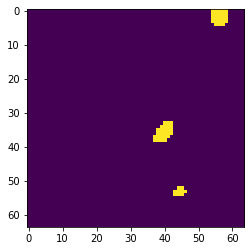

In [28]:
plt.imshow(ans[0,:,:,0] > 0.1)

In [30]:
divided = divide_figures(np.array([ans[0] > 0.1]))

In [31]:
len(divided)

3

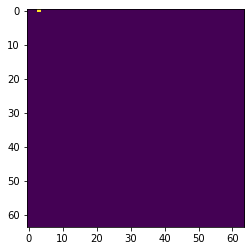

In [18]:
plt.imshow(divided[3][:,:,0])

In [77]:
def find_centers_on_mask_new(mask, thr, binary=True):
    import numpy as np

    mask_binary = np.copy(mask)
    mask_binary = np.array(mask_binary >= thr, dtype=np.float32)
    
    figures = divide_figures(mask_binary)
    centers = []
    for figure in figures:
        if not binary:
            f = np.zeros_like(mask)
            f[np.where(figure)] = mask[np.where(figure)]
            centers.append(find_centroid(f))
        else:
            centers.append(find_centroid(figure))
    return centers


In [33]:
def divide_figures_new(pic):
    import numpy as np
    from skimage.segmentation import flood, flood_fill
    
    coords = np.array(np.where(pic != 0))
    ans = []
    while coords.shape[1] != 0:
        seed_point = tuple(coords[:, 0])
        ans.append(flood(pic, seed_point))
        pic = flood_fill(pic, seed_point, 0)
        
        coords = np.array(np.where(pic != 0))
    
    return ans


In [34]:
def find_centroid_new(pic):
    from skimage.measure import moments
    import numpy as np
    
    if len(pic.shape) > 2:
        pic = np.copy(pic).reshape(list(pic.shape)[:-1])
    M = moments(pic)
    centroid = (M[1, 0] / M[0, 0], M[0, 1] / M[0, 0])
    
    return centroid


In [61]:
find_centers_on_mask_new(ans[0], 0.1)

(64, 64, 1)
(64, 64, 1)
(64, 64, 1)


[(1.826086956521739, 56.0),
 (35.65384615384615, 39.76923076923077),
 (53.111111111111114, 44.333333333333336)]

In [78]:
find_centers_on_mask_new(ans[0], 0.1, binary=False)

[(1.666573274693552, 56.17585661337601),
 (35.73256912039973, 39.86707183141201),
 (53.04897220873127, 44.29685411089254)]

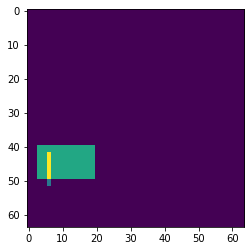

In [74]:
mask1 = np.zeros((64, 64, 1))
mask1[40:50,3:20] += 0.3
mask1[42:52,6:7] += 0.2
plt.imshow(mask1[:,:,0])

In [45]:
find_centers_on_mask(mask1, 0.1)

[(44.56976744186046, 10.94186046511628)]

In [50]:
find_centers_on_mask_new(mask1, 0.1, binary=False)

[(44.56976744186046, 10.94186046511628)]

In [53]:
find_centroid(mask1), find_centroid(np.array(mask1 > 0.1))

((44.575471698113205, 10.81132075471698),
 (44.56976744186046, 10.94186046511628))